K= 1 时,S点 [5 3] 的预测值为： 1
K= 2 时,S点 [5 3] 的预测值为： 1
K= 3 时,S点 [5 3] 的预测值为： -1
K= 4 时,S点 [5 3] 的预测值为： -1
K= 5 时,S点 [5 3] 的预测值为： -1
K= 6 时,S点 [5 3] 的预测值为： 1


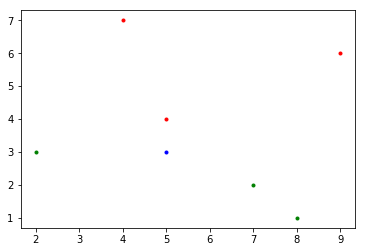

正实例：红色
负实例：绿色
预测实例：蓝色


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline
class KNN(object):
    def __init__(self, X, y,k=3):
        self.X = X
        self.y = y
        self.k = k

    def single_predict(self, x):
        diffmat = np.repeat(x, self.X.shape[0]).reshape(
            x.shape[1], self.X.shape[0]).T - self.X
        squarediffmat = ((np.matrix(np.array(diffmat)**2))
            .sum(axis=1)).astype('float')
        result = []
        for k in range(self.k):
            index = np.where(squarediffmat == np.min(squarediffmat))
            result.append(self.y[index[0][0]])
            squarediffmat[index] = float('inf')
        return Counter(result).most_common(1)[0][0]

def main():
    X_train=np.array([[5,4],[9,6],[4,7],[2,3],[8,1],[7,2]])
    y_train=np.array([1,1,1,-1,-1,-1])
    X_test=np.array([[5,3]])
    for k in range(1,7):
        clf = KNN(X_train, y_train,k=k)
        pre_y = clf.single_predict(X_test)
        print('K=',k,'时,S点',X_test[0],'的预测值为：',pre_y)
    plt.plot([5,9,4],[4,6,7],'r.')
    plt.plot([2,8,7],[3,1,2],'g.')
    plt.plot(5,3,'b.')
    plt.show()
    print('正实例：红色')
    print('负实例：绿色')
    print('预测实例：蓝色')

if __name__ == '__main__':
    main()